<a href="https://colab.research.google.com/github/ans90990/Assignment-8/blob/main/Denosing_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500
235/235 [==============================] - 2s 6ms/step - loss: 0.6967 - val_loss: 0.6966
Epoch 2/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6965 - val_loss: 0.6964
Epoch 3/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6963 - val_loss: 0.6962
Epoch 4/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6960 - val_loss: 0.6959
Epoch 5/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 6/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 7/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 8/500
235/235 [==============================] - 2s 7ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 9/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - val_loss: 0.6950
Epoch 10/500
235/235 [==============================] - 1s 5ms/step - loss: 0.6948 - val_lo

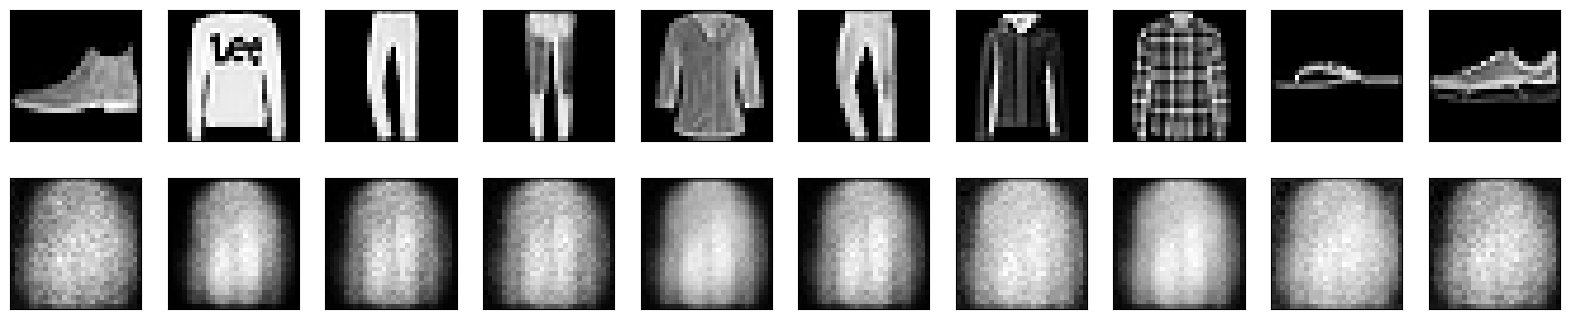

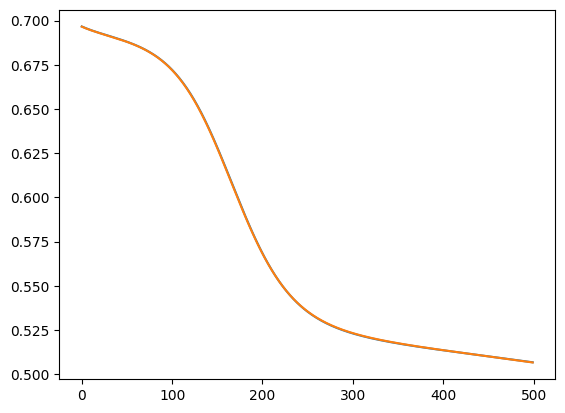

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))
#2 predict
images = autoencoder.predict(x_test)
import matplotlib.pyplot as plt

imDisplay = 10

plt.figure(figsize = (20,4))
for i in range(imDisplay):
  #display the original images first
  org = plt.subplot(2, imDisplay , i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  org.get_xaxis().set_visible(False)
  org.get_yaxis().set_visible(False)

  #then display the reconstructed images
  reci= plt.subplot(2, imDisplay, i + 1 + imDisplay)
  plt.imshow(images[i].reshape(28, 28))
  plt.gray()
  reci.get_xaxis().set_visible(False)
  reci.get_yaxis().set_visible(False)

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.show()
